# Energy nanojoule por bit

## Importanto bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# deixar a pasta scripts vizivel no notebook
%load_ext autoreload
%autoreload 2

import sys
import os

module_path = os.path.abspath(os.path.join('..', 'pyscripts'))
if module_path not in sys.path :
    sys.path.append(module_path)

In [3]:
# import module from scripts folder
import process_data

## Pre processing 

In [4]:
## import dataset from ../data
data_folder = os.path.join('..','Simulations')

simulations = ['PA','PB','CL2','CL4','CLBinomial']

# the same file will be searching
main_file = 'energy_NJ_per_bit.txt'

df_data = pd.DataFrame()

for folder in simulations:
    data_file = os.path.join(data_folder,folder,main_file)
    df = process_data.parser_main_table(data_file)
    df['Simulation'] = folder
    df_data = df_data.append(df,ignore_index=True)

del df

In [5]:
df_data.sample(10)

,info_0,info_1,node=1,node=2,node=3,node=4,node=5,Simulation
4,setRateMedium,InterfModel=0,197.287,497.68567,197.908,494.55533,65.4656,PA
26,setRateLow,InterfModel=0,498.215,495.37267,504.588,502.05933,250.77567,CLBinomial
9,setRateLow,InterfModel=2,544.00667,498.51767,689.358,533.66033,302.12433,PB
25,setRateHigh,InterfModel=2,107.76333,103.62267,71.70873,50.69773,53.26097,CLBinomial
2,setRateLow,InterfModel=0,493.00367,495.327,492.46467,496.83033,247.31,PA
7,setRateHigh,InterfModel=2,120.87367,102.66667,95.11867,54.54257,84.57563,PB
16,setRateMedium,InterfModel=0,204.97867,498.82733,206.77667,507.503,66.39497,CL2
0,setRateHigh,InterfModel=0,102.858,103.04567,67.21293,45.92067,47.0386,PA
1,setRateHigh,InterfModel=2,106.18667,102.848,69.3053,50.02217,51.60467,PA
20,setRateLow,InterfModel=0,513.02,496.18333,519.94533,491.95833,245.91233,CL4


### Normalizando valores dos atributos

In [6]:
df_data.dtypes

info_0        object
info_1        object
node=1        object
node=2        object
node=3        object
node=4        object
node=5        object
Simulation    object
dtype: object

In [7]:
numeric_columns = ['node=1', 'node=2', 'node=3', 'node=4', 'node=5']
df_data[numeric_columns] = df_data[numeric_columns].astype('float')

In [8]:
modelo_colisao = {
    'InterfModel=0': 'sem colisão',
    'InterfModel=2': 'com colisão'
}

collision_model = {
    'InterfModel=0': 'without collision',
    'InterfModel=2': 'with collision'
}

def infer_collision_model(value,mapper=modelo_colisao):
    return mapper.get(value,value)

df_data['info_1'] = df_data['info_1'].apply(infer_collision_model)

In [9]:
taxa_dados = {
    'setRateLow' : 'baixa',
    'setRateMedium': 'média',
    'setRateHigh' : 'alta'
}

packet_rate = {
    'setRateLow' : 'low',
    'setRateMedium': 'medium',
    'setRateHigh' : 'high'
}

def infer_packet_rate(value,mapper=taxa_dados):
    return mapper.get(value,value)

df_data['info_0'] = df_data['info_0'].apply(infer_packet_rate)

### Renomeando colunas

In [10]:
nodes_PTbr = {
        'info_0' : 'Taxa-dados',
        'info_1' : 'Modelo-colisão',
        'node=1': 'E-Punho',
        'node=2': 'D-Punho',
        'node=3': 'E-Tornozelo',
        'node=4': 'D-Tornozelo',
        'node=5': 'Peito',
        'Simulation': 'Simulação'
    }

nodes_ENG = {
        'info_0' : 'Packet-rate',
        'info_1' : 'Collision-model',
        'node=1': 'L-wrist',
        'node=2': 'R-wrist',
        'node=3': 'L-ankle',
        'node=4': 'R-ankle',
        'node=5': 'chest',
    }

df_data.rename(mapper=nodes_PTbr,axis='columns', inplace=True)

In [11]:
df_data.sample(10)

,Taxa-dados,Modelo-colisão,E-Punho,D-Punho,E-Tornozelo,D-Tornozelo,Peito,Simulação
15,baixa,com colisão,511.23233,496.97233,515.05167,510.56400,258.22433,CL2
29,média,com colisão,202.91633,498.53400,204.95700,507.62567,66.64957,CLBinomial
13,alta,com colisão,107.68667,104.07200,71.00300,50.43043,53.16193,CL2
23,média,com colisão,207.32833,501.29000,207.76967,502.64400,66.12153,CL4
21,baixa,com colisão,514.70167,498.50467,526.21600,494.05267,249.04833,CL4
28,média,sem colisão,199.82667,497.73700,201.54867,500.85033,66.04630,CLBinomial
16,média,sem colisão,204.97867,498.82733,206.77667,507.50300,66.39497,CL2
12,alta,sem colisão,104.52000,104.01567,68.46100,46.82517,48.06143,CL2
18,alta,sem colisão,103.70267,102.98900,68.81197,46.99307,47.21180,CL4
24,alta,sem colisão,103.83000,103.27800,69.09207,46.61200,48.41300,CLBinomial


In [12]:
df_data.columns

Index(['Taxa-dados', 'Modelo-colisão', 'E-Punho', 'D-Punho', 'E-Tornozelo',
       'D-Tornozelo', 'Peito', 'Simulação'],
      dtype='object')

In [13]:
df_data.dtypes

Taxa-dados         object
Modelo-colisão     object
E-Punho           float64
D-Punho           float64
E-Tornozelo       float64
D-Tornozelo       float64
Peito             float64
Simulação          object
dtype: object

In [14]:
df = df_data.describe()
df

,E-Punho,D-Punho,E-Tornozelo,D-Tornozelo,Peito
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,273.988934,367.015734,274.657479,354.499049,127.336802
std,173.906275,189.373644,200.881684,220.204646,96.009186
min,102.858000,102.666670,67.212930,45.920670,47.038600
25%,107.959670,104.160750,73.827190,50.497255,55.872070
50%,204.360000,496.767500,206.802835,497.625330,66.522270
75%,497.122332,498.514420,502.619918,506.266415,247.688997
max,544.006670,507.885330,689.358000,559.897330,302.124330


In [15]:
value_vars = list(df.columns)
id_vars = set(df_data.columns) - set(df.columns)
id_vars = list(id_vars)

### Reorganizando a tabela

In [16]:
df = df_data.melt(id_vars=id_vars,
                  value_vars=value_vars,
                  value_name = 'Nanojoule',
                  var_name='Nó-sensor'
                 )

In [17]:
df.head(10)

,Simulação,Modelo-colisão,Taxa-dados,Nó-sensor,Nanojoule
0,PA,sem colisão,alta,E-Punho,102.85800
1,PA,com colisão,alta,E-Punho,106.18667
2,PA,sem colisão,baixa,E-Punho,493.00367
3,PA,com colisão,baixa,E-Punho,493.84433
4,PA,sem colisão,média,E-Punho,197.28700
5,PA,com colisão,média,E-Punho,200.07700
6,PB,sem colisão,alta,E-Punho,107.94867
7,PB,com colisão,alta,E-Punho,120.87367
8,PB,sem colisão,baixa,E-Punho,506.68167
9,PB,com colisão,baixa,E-Punho,544.00667


In [18]:
df.dtypes

Simulação          object
Modelo-colisão     object
Taxa-dados         object
Nó-sensor          object
Nanojoule         float64
dtype: object

## Visualization

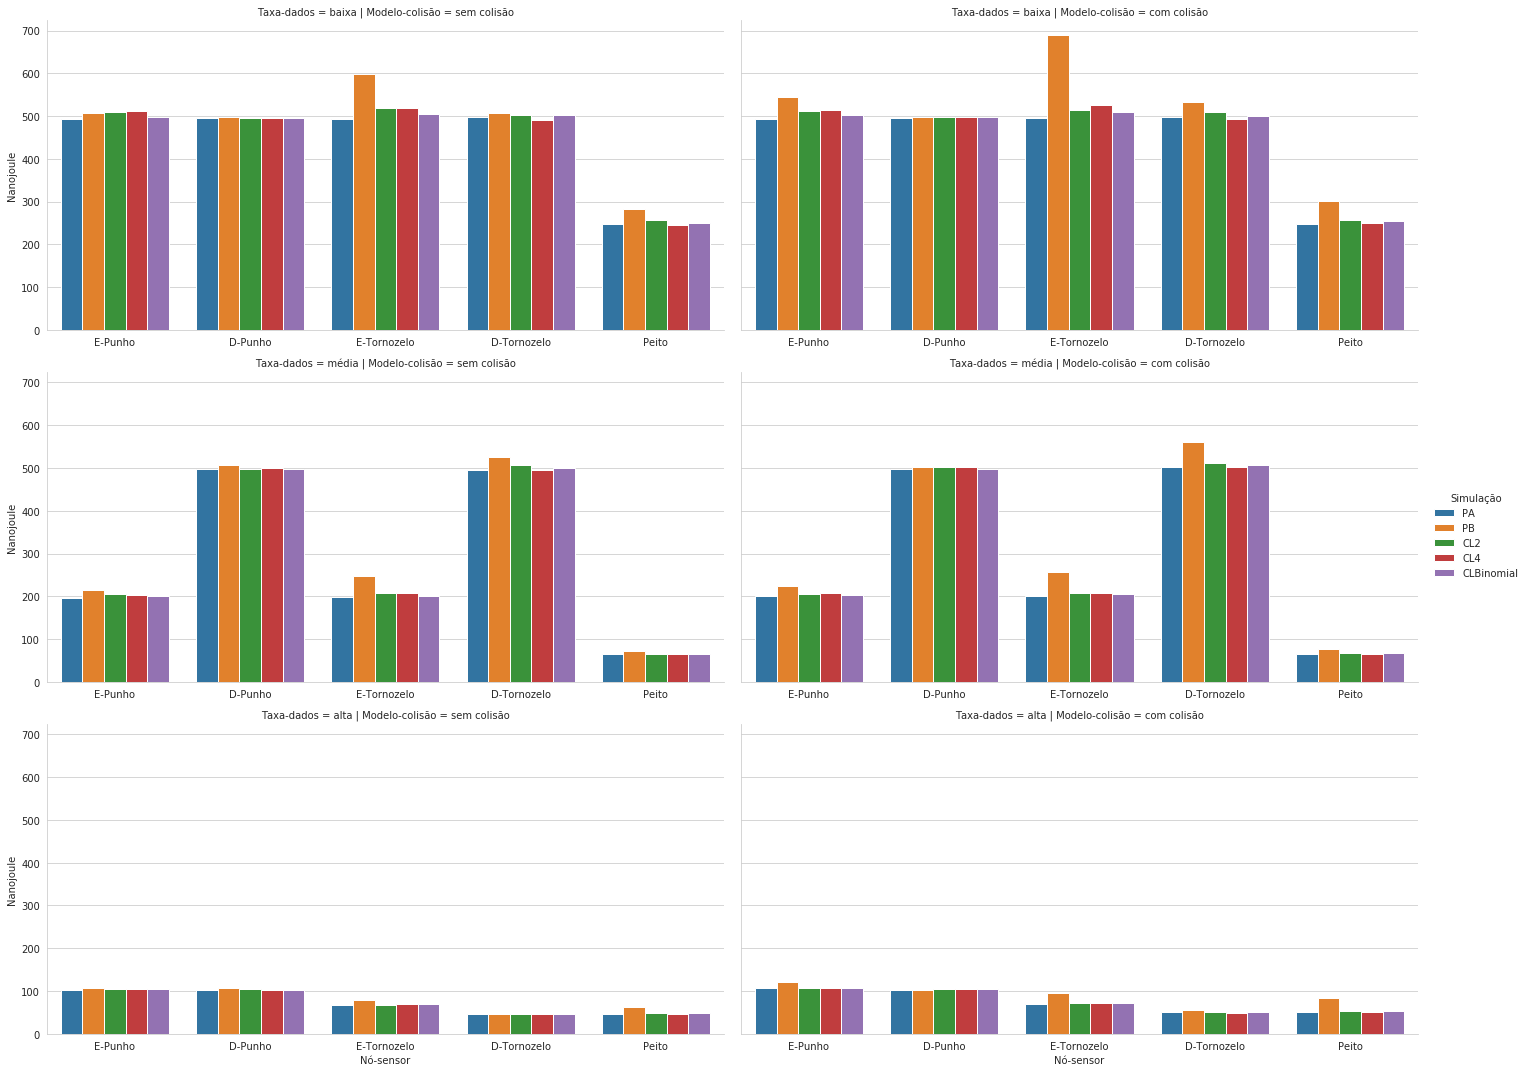

In [19]:
g = sns.catplot(data=df,
                x='Nó-sensor',
                y='Nanojoule',
                hue='Simulação',
                hue_order=simulations,
                col='Modelo-colisão',
                row='Taxa-dados',
                row_order=['baixa', 'média', 'alta'],
                kind='bar',
                height=5,
                aspect=2,
#                 ci=None,
                sharex=False,
               )

### Codificação dos atributos para o gráfico

Atributo       |      Tipo     |  Componente |
---------------|---------------|-------------|
Modelo-colisão |   categorico  | cor (colorido\cinza) 
Simulação      |   categorico  | cor - (colorido)
Taxa-dados     |   categorico  | ??
Nó-sensor      |   categorico  | barra - eixo x
Nanojoule      |   numérico    | altura - eixo y

In [20]:
simulacao_attr = df['Simulação'].unique()
taxa_dados_attr = df['Taxa-dados'].unique()
modelo_colisao_attr = df['Modelo-colisão'].unique()
no_sensor_attr = df['Nó-sensor'].unique()

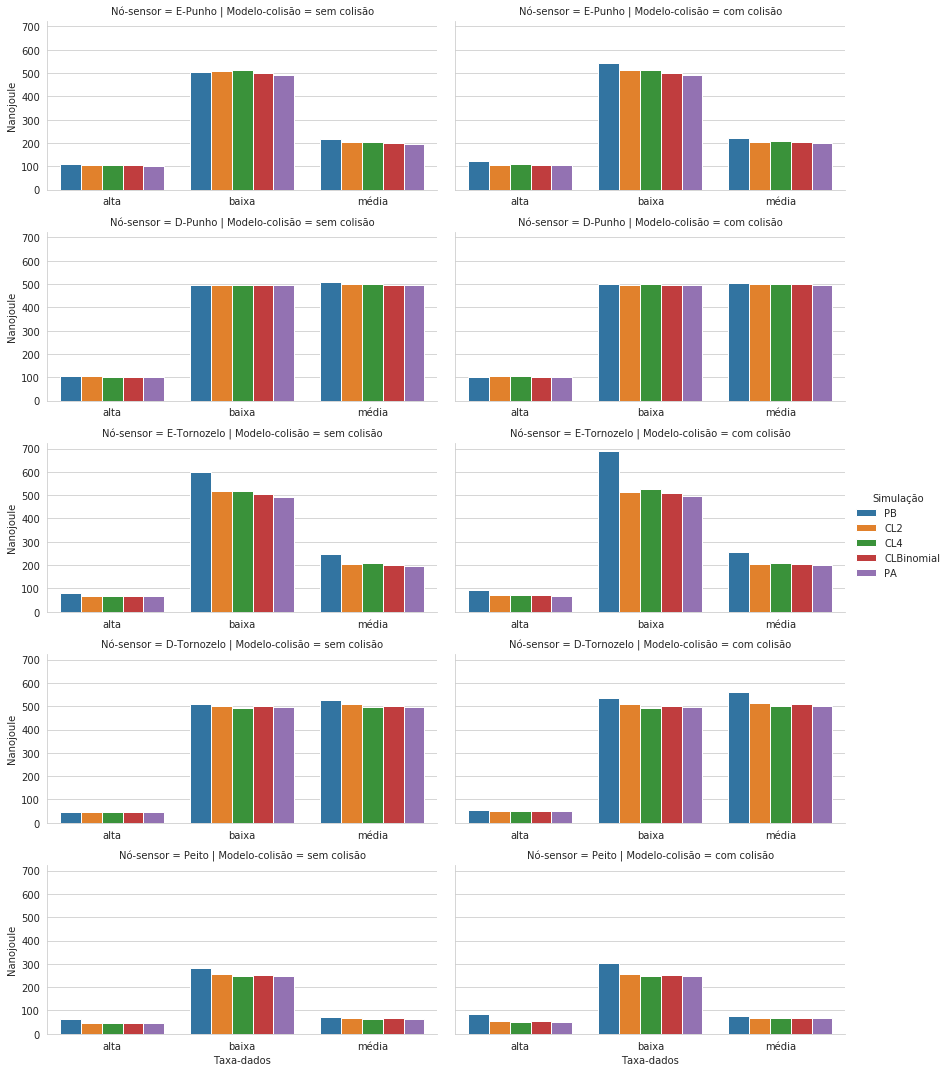

In [21]:
g = sns.catplot(data=df,
                x='Taxa-dados',
                y='Nanojoule',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                col='Modelo-colisão',
                row='Nó-sensor',
                kind='bar',
                height=3,
                aspect=2,
#                 ci=None,
                sharex=False,
               )

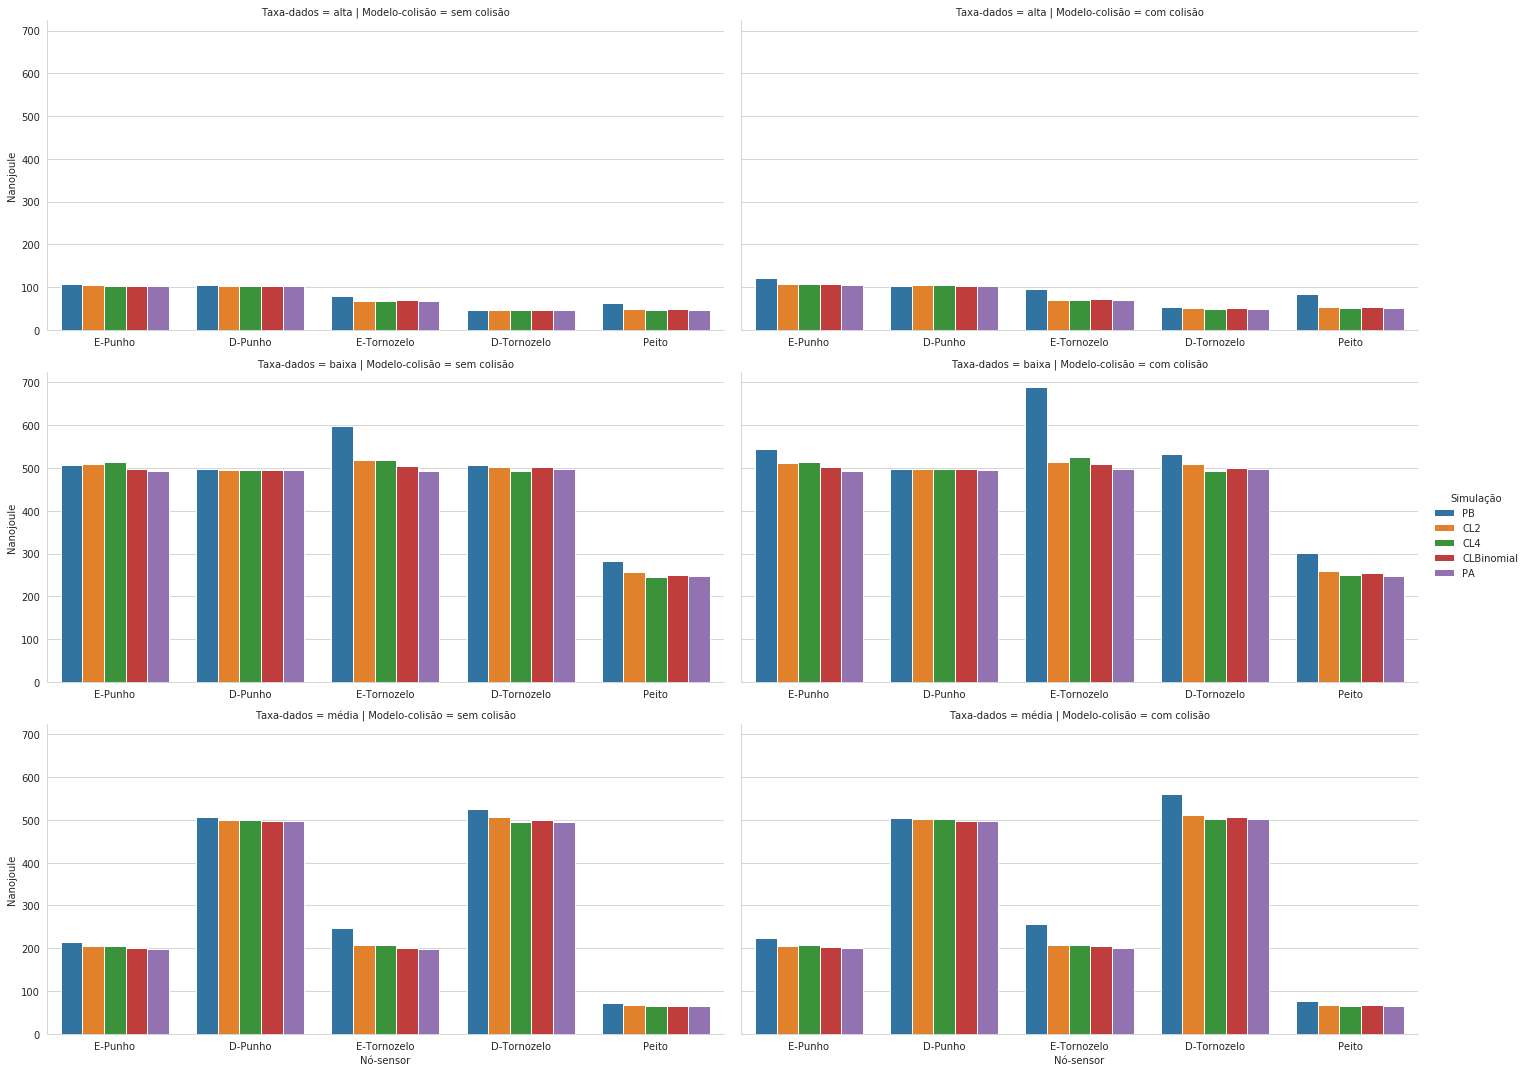

In [22]:
g = sns.catplot(data=df,
                x='Nó-sensor',
                y='Nanojoule',
                hue='Simulação',
                hue_order=['PB', 'CL2', 'CL4','CLBinomial', 'PA'],
                col='Modelo-colisão',
                row='Taxa-dados',
                kind='bar',
                height=5,
                aspect=2,
#                 ci=None,
                sharex=False,
               )

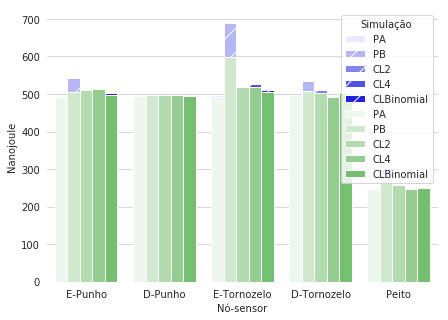

In [23]:
f, ax = plt.subplots(figsize=(7, 5))

data = df[df['Taxa-dados'] == 'baixa']

sns.barplot(
            y="Nanojoule",
            x="Nó-sensor",
            hue="Simulação",
            data=data[data['Modelo-colisão'] == 'com colisão'],
            hatch='/',
            color='b',
            )
sns.set_color_codes("muted")

ax = sns.barplot(
            y="Nanojoule",
            x="Nó-sensor",
            hue="Simulação",
            data=data[data['Modelo-colisão'] == 'sem colisão'],
            hatch='',
            color='g',
            )

sns.despine(left=True, bottom=True)